In [101]:
import matplotlib.pyplot as plt
import torch
import timm
import numpy as np
import deepsim_analyzer as da

img = da.io.load_image("../data/raw_immutable/tiny_test_images/adriaen-brouwer_the-bitter-drunk.jpg", return_np=False)

# resize all images to the same size to get consistent magnitudes when summing the activation values.
# the distortion added by doing so shouldnt be too bad
img = img.resize((512, 512))

img_array = np.array(img)[np.newaxis, :]
# img_array = img_array[np.newaxis, :]

img_tensor = torch.tensor(img_array, dtype=torch.float32)
# change to channel first
img_tensor = img_tensor.permute(0,3,1,2)

m = timm.create_model('xception41', pretrained=True)

In [105]:
# there are 12 inception blocks in the model, each makes the h and w smaller but channels bigger
out = m.stem(img_tensor)
out = m.blocks[0](out)
out = m.blocks[1](out)
# out = m.blocks[2](out)
# out = m.blocks[3](out)
# out = m.blocks[4](out)
out.shape

torch.Size([1, 256, 64, 64])

min: -2.145545482635498, max: 9.586682319641113
total absolute activation strength: 6431.3984375


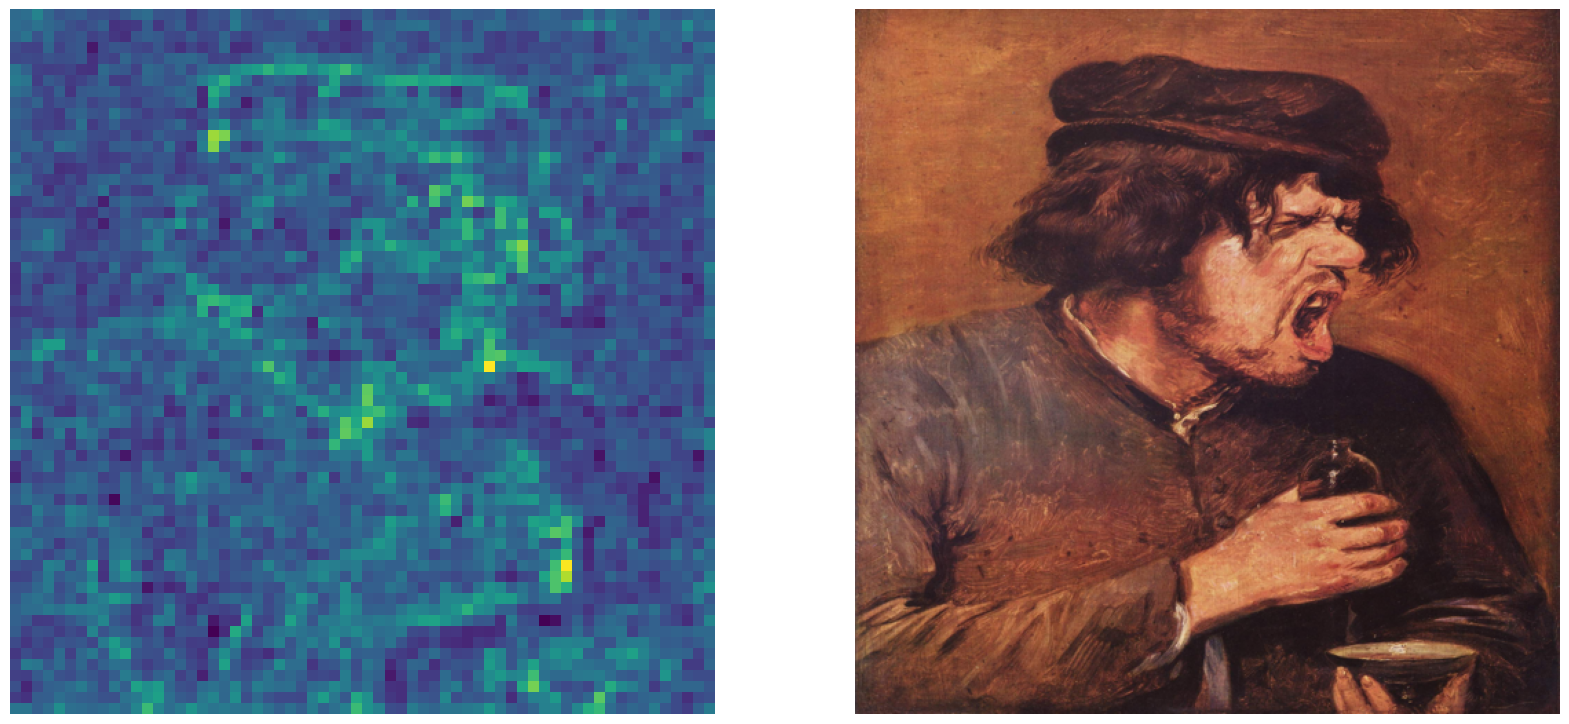

min: -4.891847610473633, max: 11.922075271606445
total absolute activation strength: 9892.86328125


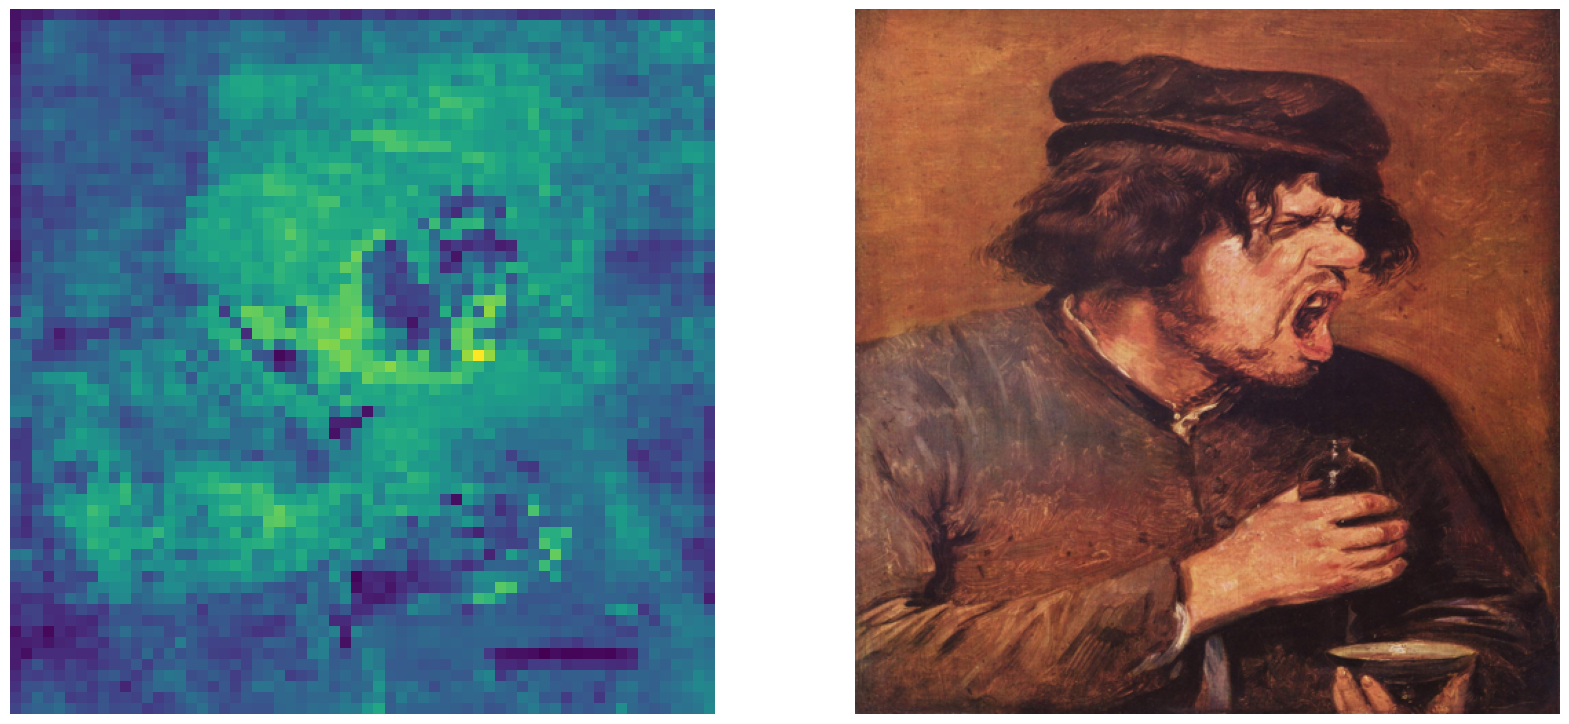

min: -4.696824550628662, max: 7.021646499633789
total absolute activation strength: 9691.970703125


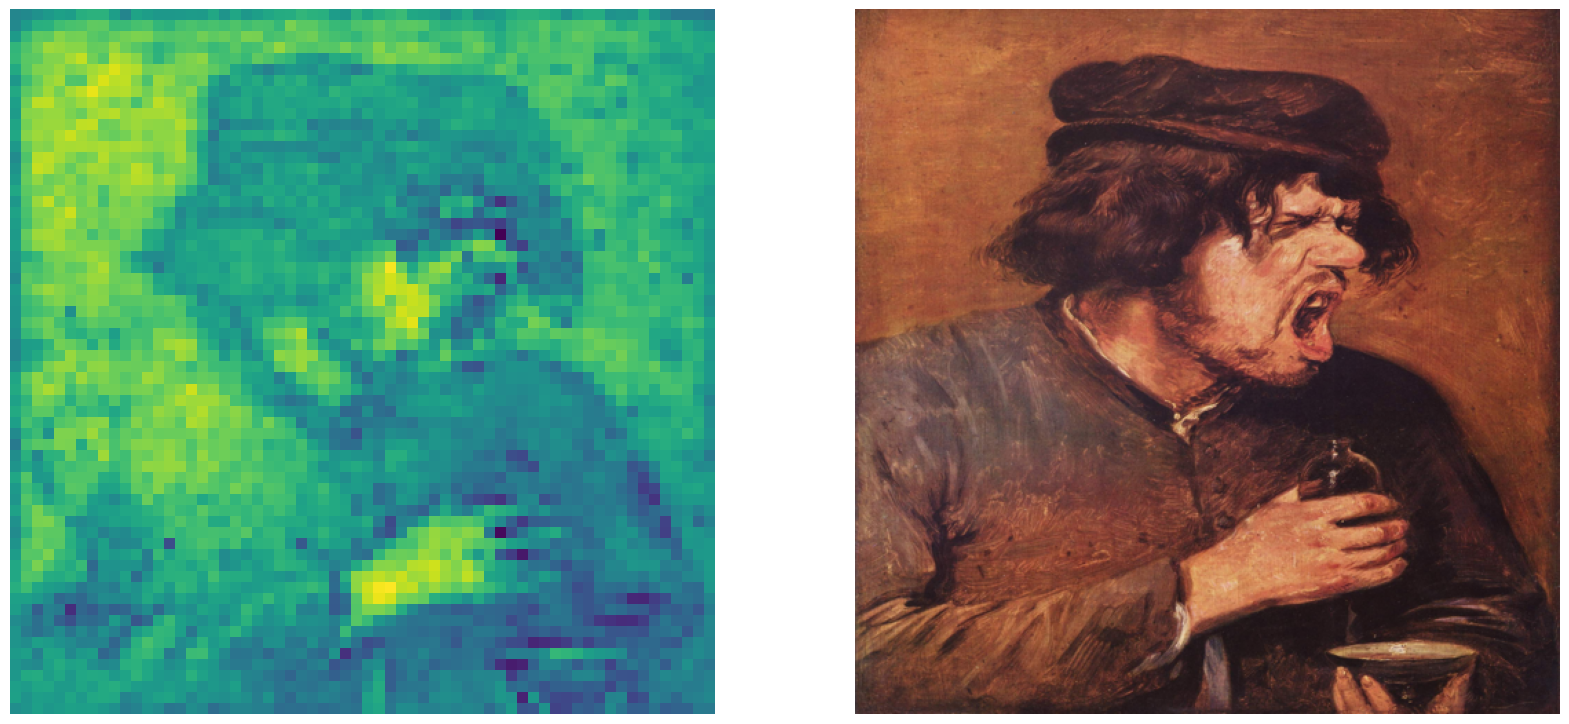

min: -10.23348331451416, max: 6.049376487731934
total absolute activation strength: 6795.9501953125


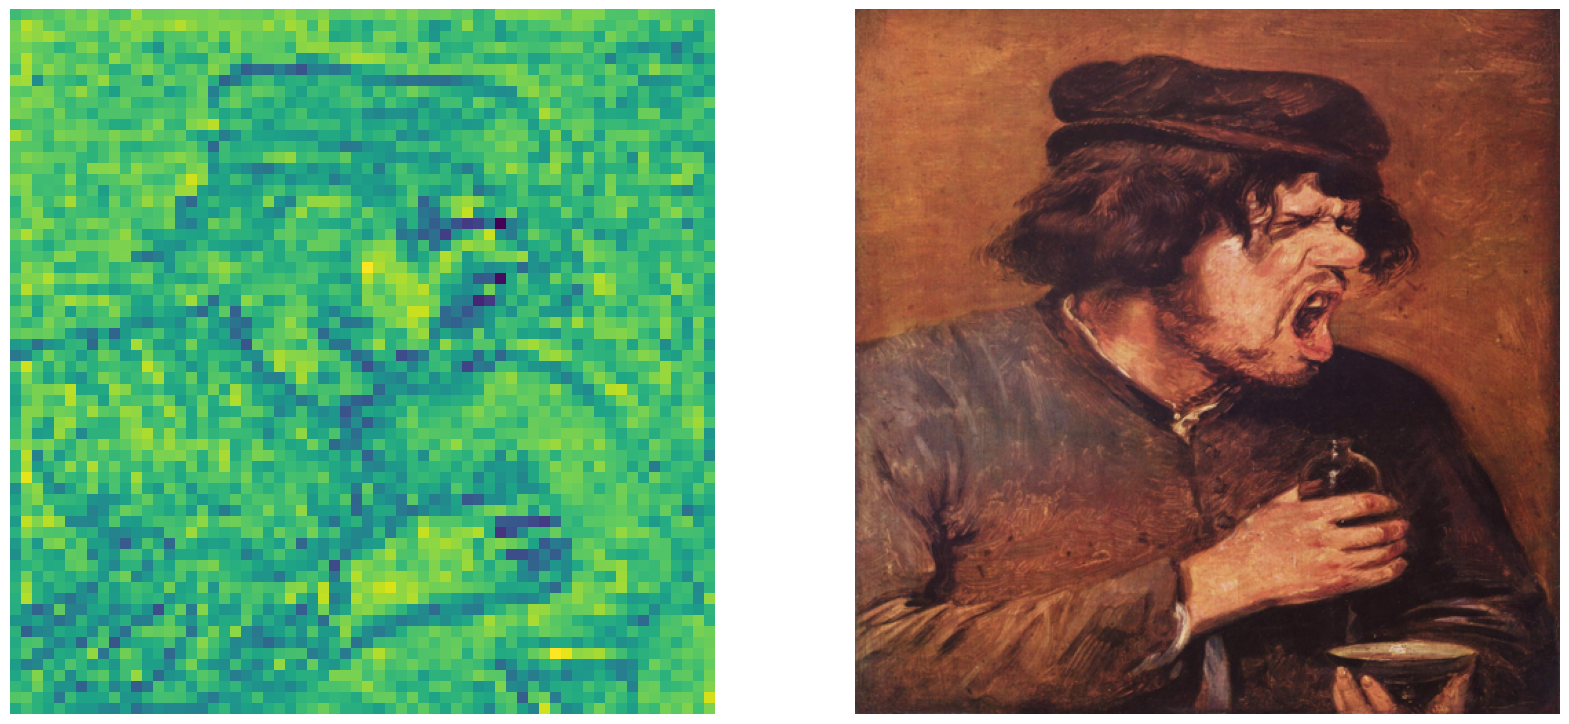

min: -7.595261573791504, max: 9.479093551635742
total absolute activation strength: 7286.384765625


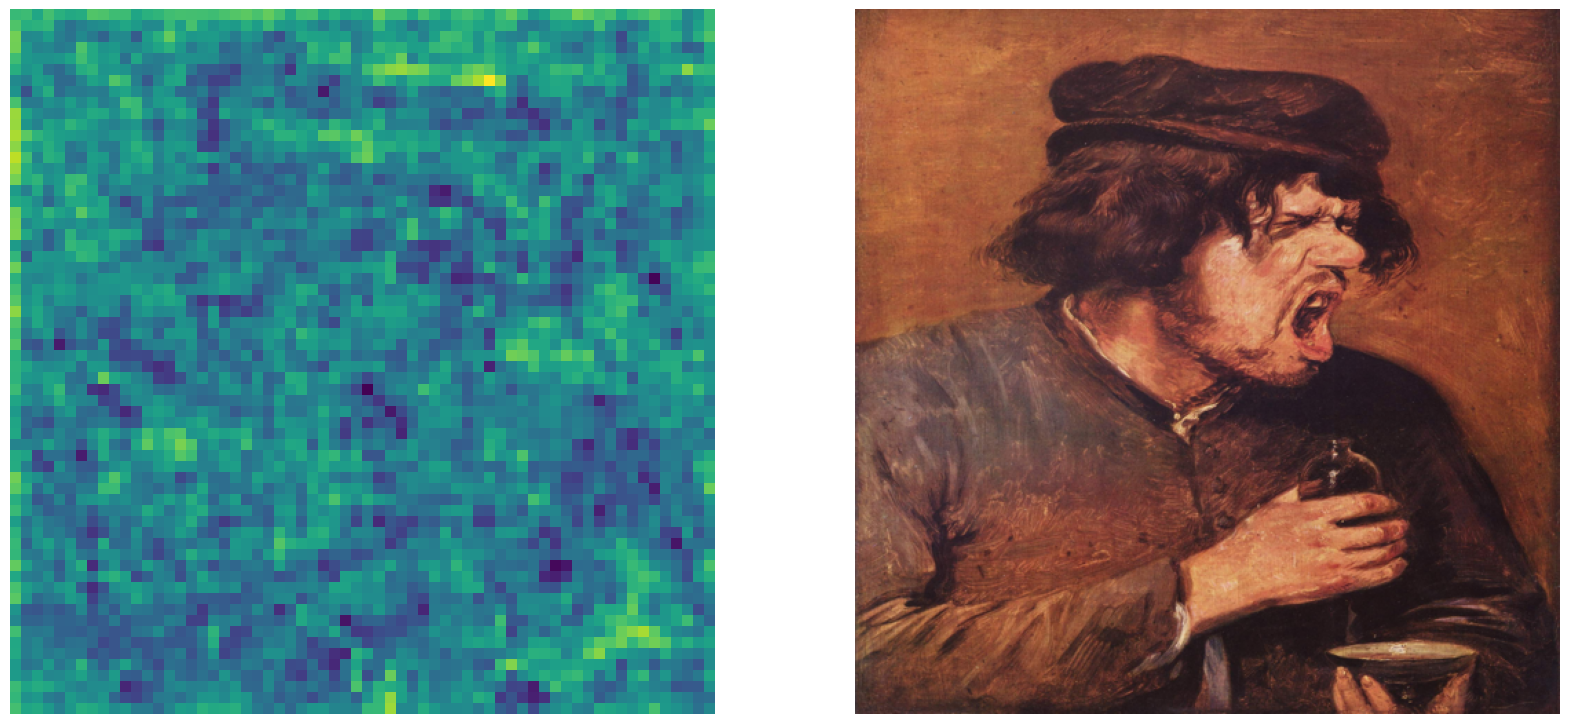

In [109]:
filter_idx = 1

for i in range(5):
    filter_idx = i
    plottable = out.detach().numpy().squeeze()
    print(f"min: {np.min(plottable[filter_idx])}, max: {np.max(plottable[filter_idx])}")
    print(f"total absolute activation strength: {np.sum(np.absolute(plottable[filter_idx]))}")
    
    f, axarr = plt.subplots(1,2, figsize=(20,10))
    axarr[0].imshow(plottable[filter_idx])
    axarr[0].axis('off')
    axarr[1].imshow(img)
    axarr[1].axis('off')
    plt.show()

In [104]:
m

XceptionAligned(
  (stem): Sequential(
    (0): ConvNormAct(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (1): ConvNormAct(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
  )
  (blocks): Sequential(
    (0): XceptionModule(
      (shortcut): ConvNormAct(
        (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (bn): BatchNormAct2d(
          128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
      (stack): Sequential(
     